In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### Ερώτημα 1
---

Δίνεται το ακόλουθο σύνολο δεδομένων το οποίο καλείστε να χρησιμοποιήσετε για να μάθετε (εκτιμήσετε) την πραγματική απεικόνιση μεταξύ δεδομένων εισόδου και στόχου.

Θεωρήστε τον χώρο υποθέσεων που αποτελείται από τις ακόλουθες πραγματικές συναρτήσεις $f_1:\mathbb{R}\to\mathbb{R}$ με δύο παραμέτρους $w=[w_0, w_1]^\intercal\in\mathbb{R}^2$ :

$$
	f_1(x;w) = \frac{1}{1+e^{-(w_0+w_1x)}}
$$

Επιπλέον, τη συνάρτηση κόστους $L_1:\mathbb{R}^2\to\R$ η οποία δίνεται ως :

$$
	L_1(w) = -\frac{1}{n} \sum_{i=1}^n \Big( y_i \log_2 f_1(x_i;w) + (1-y_i) \log_2\big( 1 - f_1(x_i;w) \big)	\Big)
$$
όπου με $\{ (x_i,y_i ) \}_{i=1}^n$ συμβολίζονται τα δεδομένα εκπαίδευσης.

In [ ]:
data1 = np.array([[ 10.63415642, -10.31804897,  -3.91323692,  13.47455445,
         12.00245098,   7.01459213, -11.5083141 ,   7.83875   ,
        -11.21021617,   6.95282804,   7.79101979,  13.94835343,
          3.01243432,  11.67679791,  13.41197807,  14.61995534,
         -8.70743264, -14.10312612, -11.68244994,  14.75202699,
          9.25316629,  -4.82661632,  -6.99915042,   6.49562369,
        -11.46126563,  -9.38897405,  -3.68953244,  -5.95603391,
        -10.80285714, -11.78004227],
       [  1.        ,   0.        ,   0.        ,   1.        ,
          1.        ,   1.        ,   0.        ,   1.        ,
          0.        ,   1.        ,   1.        ,   1.        ,
          1.        ,   1.        ,   1.        ,   1.        ,
          0.        ,   0.        ,   0.        ,   1.        ,
          1.        ,   0.        ,   0.        ,   1.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ]])
data1

array([[ 10.63415642, -10.31804897,  -3.91323692,  13.47455445,
         12.00245098,   7.01459213, -11.5083141 ,   7.83875   ,
        -11.21021617,   6.95282804,   7.79101979,  13.94835343,
          3.01243432,  11.67679791,  13.41197807,  14.61995534,
         -8.70743264, -14.10312612, -11.68244994,  14.75202699,
          9.25316629,  -4.82661632,  -6.99915042,   6.49562369,
        -11.46126563,  -9.38897405,  -3.68953244,  -5.95603391,
        -10.80285714, -11.78004227],
       [  1.        ,   0.        ,   0.        ,   1.        ,
          1.        ,   1.        ,   0.        ,   1.        ,
          0.        ,   1.        ,   1.        ,   1.        ,
          1.        ,   1.        ,   1.        ,   1.        ,
          0.        ,   0.        ,   0.        ,   1.        ,
          1.        ,   0.        ,   0.        ,   1.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ]])

In [ ]:
def sigmoid(z):
    z = np.clip(z, -500, 500)  # Clip to avoid overflow
    return 1 / (1 + np.exp(-z))

def binary_cross_entropy(y_true, y_pred):
    eps = 1e-10  # Avoid log(0) issues
    return -np.mean(y_true * np.log(y_pred + eps) + (1 - y_true) * np.log(1 - y_pred + eps))

def compute_gradients(x,y,w):
    m = len(x)
    predictions = sigmoid(w[0] + w[1] * x)
    error = predictions - y
    grad_w0 = np.mean(error)
    grad_w1 = np.mean(error * x)
    return np.array([grad_w0, grad_w1]),predictions



def gradient_descent_f1(x,y,w, learning_rate=10**(-3),epochs = 150):
    w = np.array(w, dtype=np.float64)
    losses = []
    for epoch in range(epochs):
        # if epoch > 100 and epoch < 140:
        #     learning_rate = 0.0005
        # elif epoch > 140 :
        #     learning_rate = 0.0001
        gradients, predictions= compute_gradients(x,y,w)
        loss = binary_cross_entropy(y,predictions)
        losses.append(loss)
        w -= learning_rate * gradients
        learning_rate -= 10**(-6)
    return w,losses,predictions




x_train , y_train = data1[0],data1[1]
w_init = [0.0,1.0]
optimized_w,losses,final_predictions = gradient_descent_f1(x_train,y_train,w_init)
print("Optimized weights:", optimized_w)

Optimized weights: [-2.09453176e-05  1.00185203e+00]


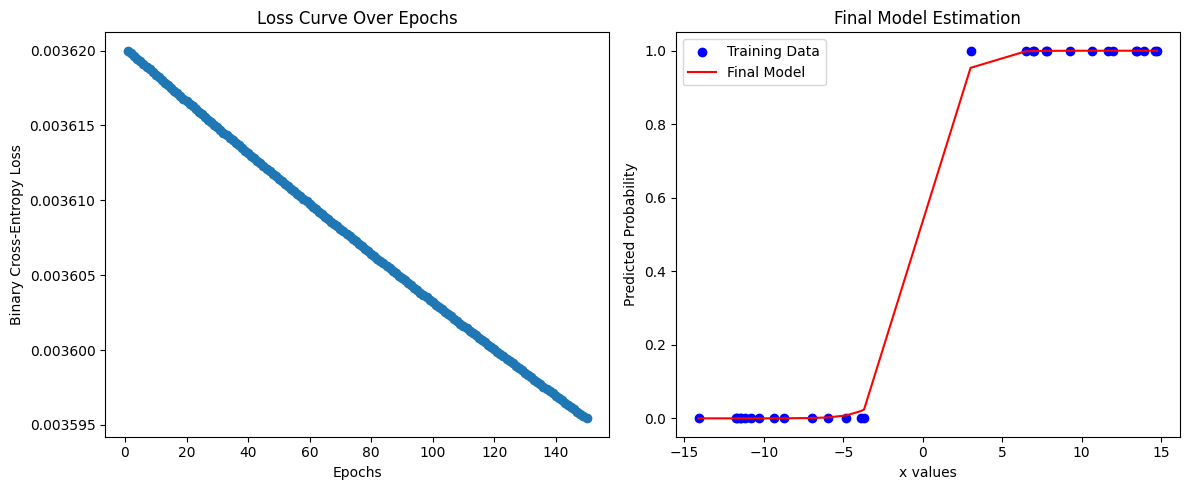

In [ ]:
# Plot loss curve
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, 151), losses, marker='o', linestyle='-')
plt.xlabel("Epochs")
plt.ylabel("Binary Cross-Entropy Loss")
plt.title("Loss Curve Over Epochs")

sorted_indices = np.argsort(x_train)
sorted_x = x_train[sorted_indices]
sorted_y_pred = final_predictions[sorted_indices]

# Plot training data and final model
plt.subplot(1, 2, 2)
plt.scatter(x_train, y_train, color='blue', label='Training Data')
plt.plot(sorted_x, sorted_y_pred, color='red', linestyle='-', label='Final Model')
plt.xlabel("x values")
plt.ylabel("Predicted Probability")
plt.title("Final Model Estimation")
plt.legend()

plt.tight_layout()
plt.show()


1.1 Το μοντέλο που εκπαιδεύτηκε με σταθερό 𝜂=0.001 αποδίδει καλά. Η συνάρτηση κόστους μειώνεται σταθερά, δείχνοντας ότι τα βάρη προσαρμόζονται αποδοτικά. Το τελικό μοντέλο φαίνεται να κατηγοριοποιεί σωστά τα δεδομένα εκπαίδευσης. Παρόλα αυτά, αν παρατηρήσουμε περαιτέρω τη συνάρτηση κόστους, διαπιστώνουμε ότι δεν συγκλίνει πλήρως. Αυτό δείχνει ότι το μοντέλο έχει περιθώρια βελτίωσης και ότι με τις τρέχουσες τιμές 𝜂 και Τ δεν έχουμε συναντήσει το ελάχιστο της συνάρτησης κόστους.Στη συνέχεια μειώνοντας το 𝜂 σε 0.0001 οι διαφορές που παρατηρούνται είναι ελάχιστες.Αυτο που φαίνεται είναι οτι η διαδικασία της εκπαίδευσης γίνεται ακόμα πιο αργή αφου η συνάρτηση κόστους μειώνεται με πιο αργό ρυθμό.Το μοντέλο μοιάζει το ίδιο με πριν.

1.2.1 Το μοντέλο στην περίπτωση μεταβολής του 𝜂 στις 100 και στις 140 επαναλήψεις δεν δείχνει μεγάλη διαφορά, υποδηλώνοντας ότι το decision threshold δεν επηρεάστηκε σημαντικά. Από την άλλη, η συνάρτηση κόστους φαίνεται βελτιωμένη, καθώς παρουσιάζει μια τάση σύγκλισης προς το τέλος. Αυτό ήταν αναμενόμενο, καθώς οι αλλαγές στα βάρη άρχισαν να μειώνονται, οδηγώντας σε πιο ομαλή μείωση της συνάρτησης κόστους.

1.2.2 Στην περίπτωση σταθερής μείωσης του 𝜂 κατά 10^−6, το μοντέλο και η συνάρτηση κόστους παρουσιάζουν παρόμοια αποτελέσματα με την πρώτη περίπτωση όπου χρησιμοποιήθηκε σταθερό 𝜂=0.001. Αυτό υποδηλώνει ότι οι μικρές μεταβολές στο 𝜂 δεν επηρεάζουν σημαντικά το μοντέλο, καθώς είναι αμελητέες. Επιπλέον, μπορούμε να συμπεράνουμε ότι για να βελτιωθεί η απόδοση της συνάρτησης κόστους, θα πρέπει είτε να αυξήσουμε το 𝜂 είτε τον αριθμό των επαναλήψεων.

---

Δίνεται το ακόλουθο σύνολο δεδομένων το οποίο καλείστε να χρησιμοποιήσετε για να μάθετε (εκτιμήσετε) την πραγματική απεικόνιση μεταξύ δεδομένων εισόδου και στόχου.

Θεωρήστε τον χώρο υποθέσεων που αποτελείται από τις ακόλουθες πραγματικές συναρτήσεις $f_2:\mathbb{R}\to\mathbb{R}$ με τέσσερις παραμέτρους $w=[w_0, w_1, w_2, w_3]^\intercal\in\mathbb{R}^4$ :

$$
	f_2(x;w) = w_0 + w_1 \sigma(w_2+w_3x)
$$
όπου η $\sigma:\mathbb{R}\to\mathbb{R}$ δίνεται ως
$$
	\sigma(x)=\begin{cases} x, & x>0 \\ 0, & x\le 0 \end{cases}
$$


Επιπλέον, τη συνάρτηση κόστους $L_2:\mathbb{R}^4\to\R$ η οποία δίνεται ως :

$$
	L_2(w) = \frac{1}{n} \sum_{i=1}^n \big( y_i - f_1(x_i;w) \big)^2
$$

**Σημείωση:** Παρατηρήστε ότι η $\sigma$ δεν είναι παραγωγίσιμη στο $\mathbf{x}=0$, καθώς τα πλευρικά όρια δε συμπίπτουν. Ωστόσο, θεωρούμε ότι η παράγωγος της δίνεται ως

$$
	\frac{d\sigma(\mathbf{x})}{dx} = \begin{cases} 1, & x>0 \\ 0, & x\le 0 \end{cases}
$$

In [ ]:
data2 = np.array([[-6.63823962e-01,  1.76259595e+00, -3.99908500e+00,
        -1.58133942e+00, -2.82595287e+00, -3.26129124e+00,
        -2.50991831e+00, -1.23551418e+00, -8.25860206e-01,
         3.10533872e-01, -6.46443885e-01,  1.48175600e+00,
        -2.36438200e+00,  3.02493949e+00, -3.78089925e+00,
         1.36374008e+00, -6.61561581e-01,  4.69518628e-01,
        -2.87690449e+00, -2.41518809e+00,  2.40595655e+00,
         3.74609261e+00, -1.49260657e+00,  1.53858093e+00,
         3.01111322e+00,  3.15685331e+00, -3.31964631e+00,
        -3.68756173e+00, -2.64135664e+00,  3.02514003e+00],
       [-7.76859909e-02,  6.84885863e+00,  2.11068734e-02,
         2.91407607e-01, -5.50309589e-01,  5.72361855e-01,
         4.50795360e-01,  2.51247169e-01,  4.50427975e-01,
         2.58973769e+00, -7.76767080e-04,  5.97738329e+00,
        -1.33944040e-01,  1.13399962e+01, -3.45830376e-01,
         5.89284348e+00, -3.28271093e-01,  2.98595306e+00,
        -3.35623065e-01, -6.33229946e-03,  8.65921447e+00,
         1.33554857e+01,  8.29901089e-01,  6.98676486e+00,
         1.09374219e+01,  1.10267454e+01, -3.73579147e-01,
         8.46227301e-01,  2.54038774e-02,  1.07569223e+01]])
data2

array([[-6.63823962e-01,  1.76259595e+00, -3.99908500e+00,
        -1.58133942e+00, -2.82595287e+00, -3.26129124e+00,
        -2.50991831e+00, -1.23551418e+00, -8.25860206e-01,
         3.10533872e-01, -6.46443885e-01,  1.48175600e+00,
        -2.36438200e+00,  3.02493949e+00, -3.78089925e+00,
         1.36374008e+00, -6.61561581e-01,  4.69518628e-01,
        -2.87690449e+00, -2.41518809e+00,  2.40595655e+00,
         3.74609261e+00, -1.49260657e+00,  1.53858093e+00,
         3.01111322e+00,  3.15685331e+00, -3.31964631e+00,
        -3.68756173e+00, -2.64135664e+00,  3.02514003e+00],
       [-7.76859909e-02,  6.84885863e+00,  2.11068734e-02,
         2.91407607e-01, -5.50309589e-01,  5.72361855e-01,
         4.50795360e-01,  2.51247169e-01,  4.50427975e-01,
         2.58973769e+00, -7.76767080e-04,  5.97738329e+00,
        -1.33944040e-01,  1.13399962e+01, -3.45830376e-01,
         5.89284348e+00, -3.28271093e-01,  2.98595306e+00,
        -3.35623065e-01, -6.33229946e-03,  8.65921447e+

In [ ]:
def relu(z):
    return np.maximum(0,z)

def f2(x,w):
    return w[0] + w[1] * relu(w[2] + w[3] * x)

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def compute_gradients(x,y,w):
    m = len(x)
    predictions = f2(x,w)
    error = predictions - y
    grad_w0 = np.mean(error)
    grad_w1 = np.mean(error * relu(w[2] + w[3] * x))
    grad_w2 = np.mean(error * w[1] * (w[2] + w[3] * x > 0))
    grad_w3 = np.mean(error * w[1] * x * (w[2] + w[3] * x > 0))

    return np.array([grad_w0, grad_w1, grad_w2, grad_w3]), predictions



def gradient_descent_f1(x,y,w, learning_rate=10**(-3),epochs = 150):
    w = np.array(w, dtype=np.float64)
    losses = []
    for epoch in range(epochs):
        # if epoch > 100 and epoch < 140:
        #     learning_rate = 0.0005
        # elif epoch > 140 :
        #     learning_rate = 0.0001
        gradients, predictions= compute_gradients(x,y,w)
        loss = mean_squared_error(y,predictions)
        losses.append(loss)
        w -= learning_rate * gradients
        learning_rate -= 10**(-6)
    return w,losses,predictions




x_train , y_train = data2[0],data2[1]
w_init = [0.5,1.0,2.2,3.4]
optimized_w,losses,final_predictions = gradient_descent_f1(x_train,y_train,w_init)
print("Optimized weights:", optimized_w)

Optimized weights: [0.44703309 0.83741087 2.17885178 3.36946759]


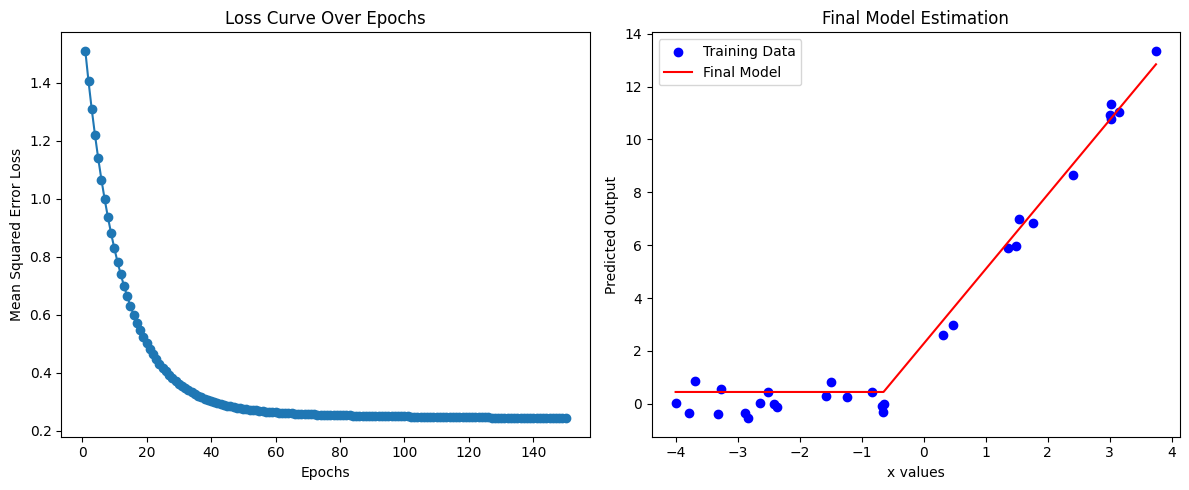

In [ ]:
# Plot loss curve
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, 151), losses, marker='o', linestyle='-')
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error Loss")
plt.title("Loss Curve Over Epochs")

sorted_indices = np.argsort(x_train)
sorted_x = x_train[sorted_indices]
sorted_y_pred = final_predictions[sorted_indices]

# Plot training data and final model
plt.subplot(1, 2, 2)
plt.scatter(x_train, y_train, color='blue', label='Training Data')
plt.plot(sorted_x, sorted_y_pred, color='red', linestyle='-', label='Final Model')
plt.xlabel("x values")
plt.ylabel("Predicted Output")
plt.title("Final Model Estimation")
plt.legend()

plt.tight_layout()
plt.show()


1.1 Σε αυτήν την περίπτωση, το μοντέλο που εκπαιδεύτηκε με σταθερό 𝜂 = 0.001 αποδίδει καλά, καθώς το τελικό μοντέλο ακολουθεί σωστά τα δεδομένα εκπαίδευσης. Η συνάρτηση κόστους μειώνεται σταθερά και τελικά φαίνεται να συγκλίνει, γεγονός που υποδεικνύει ότι τα βάρη προσαρμόζονται αποδοτικά.
Στη συνέχεια, μειώνοντας το 𝜂 = 0.0001, το μοντέλο εμφανίζει βραδύτερη μείωση στη συνάρτηση κόστους, η οποία δεν συγκλίνει πλήρως. Αυτό δείχνει ότι η εκπαίδευση επιβραδύνεται, καθώς τα βάρη δεν προσαρμόζονται αρκετά γρήγορα.
Τέλος, το τελικό μοντέλο φαίνεται λιγότερο ακριβές σε σύγκριση με πριν, υποδηλώνοντας ότι η μικρότερη τιμή του 𝜂 επηρεάζει την ικανότητα του μοντέλου να μάθει αποτελεσματικά.

1.2.1 Το μοντέλο στην περίπτωση μεταβολής του 𝜂 στις 100 και στις 140 επαναλήψεις δεν παρουσιάζει μεγάλες διαφορές σε σχέση με πριν, ούτε η συνάρτηση κόστους, η οποία δείχνει να συγκλίνει παρόμοια. Αυτό υποδηλώνει ότι το μοντέλο δεν επηρεάστηκε σημαντικά από αυτή τη μεταβολή, πιθανώς επειδή ήδη λειτουργούσε αρκετά καλά.


1.2.2 Στην περίπτωση σταθερής μείωσης του 𝜂 κατά 10^−6, το μοντέλο και η συνάρτηση κόστους παρουσιάζουν παρόμοια αποτελέσματα με την πρώτη περίπτωση όπου χρησιμοποιήθηκε σταθερό 𝜂=0.001. Αυτό υποδηλώνει ότι οι μικρές μεταβολές στο 𝜂 δεν επηρεάζουν σημαντικά το μοντέλο, καθώς είναι αμελητέες.Τέλος η συνάρτηση κόστους φαίνεται να συγκλίνει όπως και στην πρώτη περίπτωση.

### Ερώτημα 2
---

In [ ]:
import zipfile
import os
import numpy as np
import cv2
import re
import random

In [ ]:
#upload faces.zip
from google.colab import files
uploaded = files.upload()


Saving faces.zip to faces.zip


In [ ]:


# Load faces.zip
zip_path = "../content/faces.zip"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("/content/dataset")  # Extract files to a folder


In [ ]:
from sklearn.decomposition import PCA

def loadImages(path,set_number):
    image_list = []
    labels = []

    # Define ranges per set
    set_ranges = {
        1: (1, 7),
        2: (8, 19),
        3: (20, 31),
        4: (32, 45),
        5: (46, 64)
    }

    idx = int(set_number[4])
    start_idx, end_idx = set_ranges[idx]
    files = sorted(os.listdir(path))

    for filename in files:
        if filename.endswith(".png"):
            person_id = int(filename[6:8])
            img_index = int(filename[9:11])
            if start_idx <= img_index <= end_idx:
                image_path = os.path.join(path, filename)
                img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
                if img is not None:
                    #Pre-process
                    img = img.astype(np.float64)
                    mean = np.mean(img)
                    std = np.std(img)
                    if std > 0:
                        img = (img - mean) / std  # normalize
                    else:
                        img = img - mean  # avoid division by 0
                    img_vector = img.flatten()
                    image_list.append(img_vector)
                    labels.append(person_id)


    data_matrix = np.array(image_list)
    labels = np.array(labels)
    return data_matrix,labels


data_matrix,labels = loadImages("/content/dataset/faces","Set_1")


X = data_matrix

# Apply PCA with 30 components
pca = PCA(n_components=30)
X_pca = pca.fit_transform(X)

print("Original shape:", X.shape)
print("PCA shape:", X_pca.shape)
print("Labels:", labels.shape)




Original shape: (70, 2500)
PCA shape: (70, 30)
Labels: (70,)


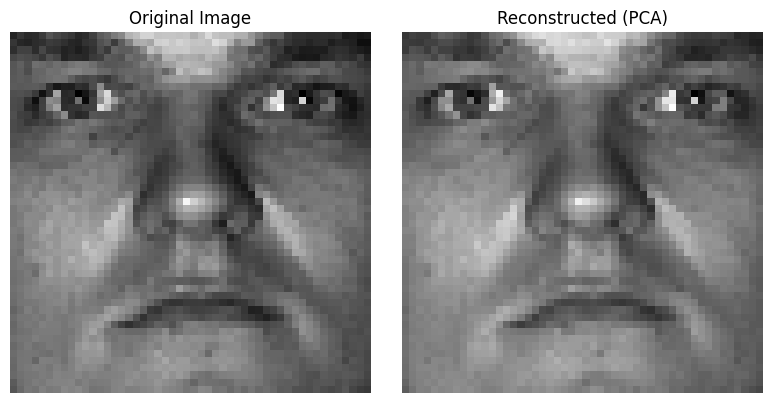

In [ ]:
import matplotlib.pyplot as plt
import random

random_idx = random.randint(0,labels.shape[0])

original_image = X[random_idx]

projected = X_pca[random_idx]

reconstructed = pca.inverse_transform(projected)

# 4. Reshape original and reconstructed to 50x50
original_image_reshaped = original_image.reshape(50, 50)
reconstructed_reshaped = reconstructed.reshape(50, 50)


# 5. Plot original vs reconstructed
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(original_image_reshaped, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(reconstructed_reshaped, cmap='gray')
plt.title("Reconstructed (PCA)")
plt.axis('off')

plt.tight_layout()
plt.show()


Παρατηρώντας τις δύο εικόνες, διακρίνουμε έντονη ομοιότητα μεταξύ τους, καθώς η ανακατασκευασμένη εικόνα διατηρεί τα βασικά χαρακτηριστικά του προσώπου. Ωστόσο, η ανακατασκευή εμφανίζεται ελαφρώς πιο θολή, καθώς κάποιες λεπτομέρειες έχουν χαθεί λόγω της μείωσης των διαστάσεων. Επιπλέον, ο φωτισμός και οι σκιές έχουν εξομαλυνθεί, γεγονός που δείχνει ότι το PCA απορρίπτει υψηλής συχνότητας πληροφορίες, όπως μικρές λεπτομέρειες και θόρυβο από διαφορετικές συνθήκες φωτισμού.

Συνολικά, για d = 30, το μοντέλο καταφέρνει να διατηρήσει τις βασικές πληροφορίες του προσώπου, ενώ παράλληλα μειώνει τον θόρυβο που προκύπτει από μικροδιαφορές στον φωτισμό.

d = 2, Mean Reconstruction Error: 31.1740
d = 24, Mean Reconstruction Error: 10.5276
d = 46, Mean Reconstruction Error: 7.8231
d = 68, Mean Reconstruction Error: 6.3067
d = 90, Mean Reconstruction Error: 5.4066
d = 112, Mean Reconstruction Error: 4.7046
d = 134, Mean Reconstruction Error: 4.0543
d = 156, Mean Reconstruction Error: 3.4896
d = 178, Mean Reconstruction Error: 2.9951
d = 200, Mean Reconstruction Error: 2.5676


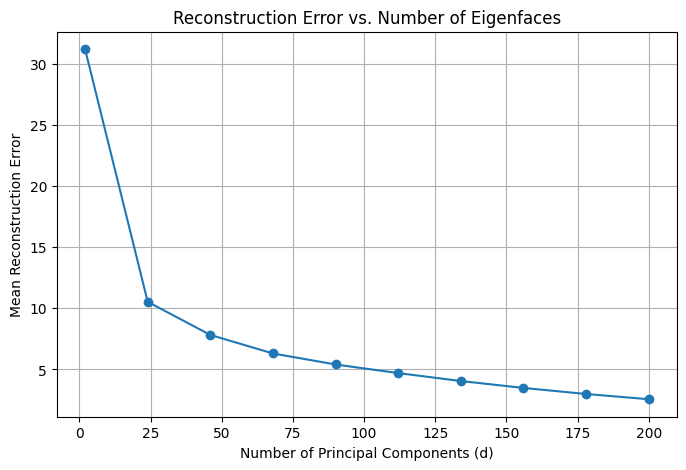

In [ ]:
#I trained on the first 3 Sets because to train with d = 200 i need at least 200 sample images

X1, y1 = loadImages("/content/dataset/faces", "Set_1")
X2, y2 = loadImages("/content/dataset/faces", "Set_2")
X3, y3 = loadImages("/content/dataset/faces", "Set_3")

X_train = np.vstack((X1, X2, X3))  # Now we have 210 samples
y_train = np.concatenate([y1, y2, y3])
d_values = np.linspace(2, 200, 10, dtype=int)

def training(d_values):
    errors = []
    pca_models = {}
    projected_train_data = {}
    for d in d_values:
        pca = PCA(n_components=d)
        X_train_pca = pca.fit_transform(X_train)

        pca_models[d] = pca
        projected_train_data[d] = X_train_pca

        # Project Set_1 images
        X1_pca = pca.transform(X1)
        X1_reconstructed = pca.inverse_transform(X1_pca)

        # Compute reconstruction error
        error = np.mean(np.linalg.norm(X1 - X1_reconstructed, axis=1))
        errors.append(error)
        print(f"d = {d}, Mean Reconstruction Error: {error:.4f}")
    return errors,pca_models,projected_train_data

computed_errors, pca_models, train_data = training(d_values)
plt.figure(figsize=(8, 5))
plt.plot(d_values, computed_errors, marker='o')
plt.xlabel("Number of Principal Components (d)")
plt.ylabel("Mean Reconstruction Error")
plt.title("Reconstruction Error vs. Number of Eigenfaces")
plt.grid(True)
plt.show()


d = 2, Mean Reconstruction Error: 31.1740
d = 24, Mean Reconstruction Error: 10.5265
d = 46, Mean Reconstruction Error: 7.8094
d = 68, Mean Reconstruction Error: 6.3033
d = 90, Mean Reconstruction Error: 5.3915
d = 112, Mean Reconstruction Error: 4.6787
d = 134, Mean Reconstruction Error: 4.0668
d = 156, Mean Reconstruction Error: 3.5069
d = 178, Mean Reconstruction Error: 3.0052
d = 200, Mean Reconstruction Error: 2.5774


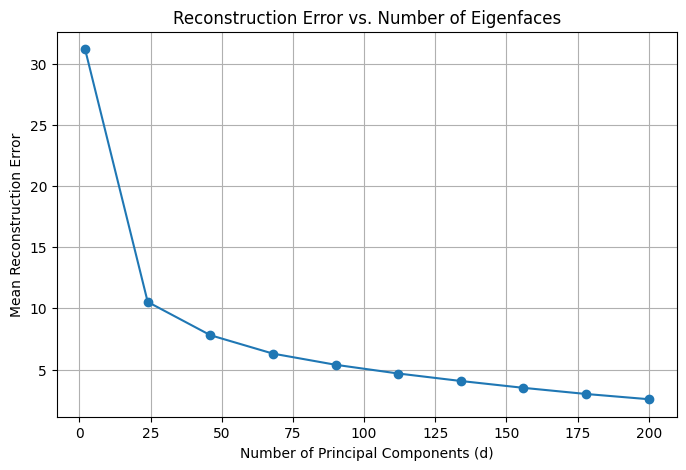

In [ ]:
X1, _ = loadImages("/content/dataset/faces", "Set_1")
X2, _ = loadImages("/content/dataset/faces", "Set_2")
X3, _ = loadImages("/content/dataset/faces", "Set_3")

X_train = np.vstack((X1, X2, X3))  # Now we have 210 samples

# --- Define d values to test ---
d_values = np.linspace(2, 200, 10, dtype=int)
errors = []

for d in d_values:
    pca = PCA(n_components=d)
    X_train_pca = pca.fit_transform(X_train)

    # Project Set_1 images using the same PCA model
    X_test_pca = pca.transform(X)
    X_test_reconstructed = pca.inverse_transform(X_test_pca)

    # Compute average reconstruction error
    error = np.mean(np.linalg.norm(X - X_test_reconstructed, axis=1))
    errors.append(error)
    print(f"d = {d}, Mean Reconstruction Error: {error:.4f}")

plt.figure(figsize=(8, 5))
plt.plot(d_values, errors, marker='o')
plt.xlabel("Number of Principal Components (d)")
plt.ylabel("Mean Reconstruction Error")
plt.title("Reconstruction Error vs. Number of Eigenfaces")
plt.grid(True)
plt.show()


Παρατηρώντας τα αποτελέσματα βλέπουμε ότι όσο αυξάνεται η μεταβλητή d η τιμή του μέσου σφάλματος μειώνεται παρουσιάζοντας τάση σύγκλισης.Το παραπάνω αποτέλεσμα είναι αναμενόμενο αφού όση περισσότερη πληροφορία κρατάμε τόσο μειώνεται το περιθώριο σφάλματος.

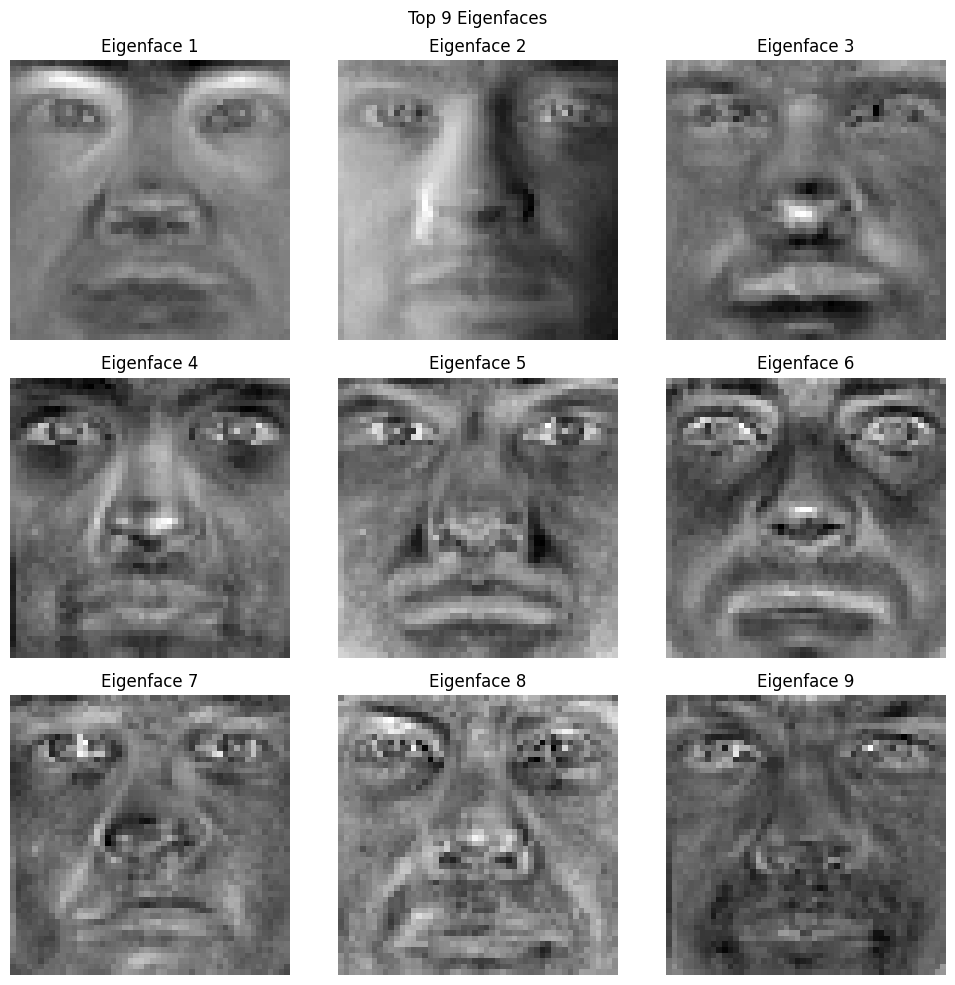

In [ ]:
pca = PCA(n_components=9)
pca.fit(X1)

eigenfaces = pca.components_  # Shape: (9, 2500)

# Plot the top 9 eigenfaces
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    eigenface_img = eigenfaces[i].reshape(50, 50)
    plt.imshow(eigenface_img, cmap='gray')
    plt.title(f"Eigenface {i + 1}")
    plt.axis('off')
plt.suptitle("Top 9 Eigenfaces")
plt.tight_layout()
plt.show()

Παρατηρώντας τα 9 κύρια ιδιοδιανύσματα, παρατηρούμε 9 διαφορετικές αναπαραστάσεις προσώπων. Αυτό που μπορούμε να διαπιστώσουμε είναι ότι οι αρχικές απεικονίσεις αποτυπώνουν πιο γενικά χαρακτηριστικά (όπως το σχήμα του προσώπου), ενώ τα επόμενα ιδιοδιανύσματα επικεντρώνονται σε πιο ιδιαίτερα χαρακτηριστικά, όπως η μύτη, ο φωτισμός ή η έκφραση του προσώπου. Αυτό που κατανοούμε από τα παραπάνω είναι ότι κάθε ιδιοδιάνυσμα έχει διαφορετική σημασία και συνεισφέρει διαφορετικά στην περιγραφή προσώπων

d = 2, Set_1 Accuracy: 1.0000
d = 2, Set_2 Accuracy: 1.0000
d = 2, Set_3 Accuracy: 1.0000
d = 2, Set_4 Accuracy: 0.1286
d = 2, Set_5 Accuracy: 0.1053
d = 24, Set_1 Accuracy: 1.0000
d = 24, Set_2 Accuracy: 1.0000
d = 24, Set_3 Accuracy: 1.0000
d = 24, Set_4 Accuracy: 0.8857
d = 24, Set_5 Accuracy: 0.4053
d = 46, Set_1 Accuracy: 1.0000
d = 46, Set_2 Accuracy: 1.0000
d = 46, Set_3 Accuracy: 1.0000
d = 46, Set_4 Accuracy: 0.9429
d = 46, Set_5 Accuracy: 0.5368
d = 68, Set_1 Accuracy: 1.0000
d = 68, Set_2 Accuracy: 1.0000
d = 68, Set_3 Accuracy: 1.0000
d = 68, Set_4 Accuracy: 0.9286
d = 68, Set_5 Accuracy: 0.6053
d = 90, Set_1 Accuracy: 1.0000
d = 90, Set_2 Accuracy: 1.0000
d = 90, Set_3 Accuracy: 1.0000
d = 90, Set_4 Accuracy: 0.9500
d = 90, Set_5 Accuracy: 0.6368
d = 112, Set_1 Accuracy: 1.0000
d = 112, Set_2 Accuracy: 1.0000
d = 112, Set_3 Accuracy: 1.0000
d = 112, Set_4 Accuracy: 0.9500
d = 112, Set_5 Accuracy: 0.6368
d = 134, Set_1 Accuracy: 1.0000
d = 134, Set_2 Accuracy: 1.0000
d = 13

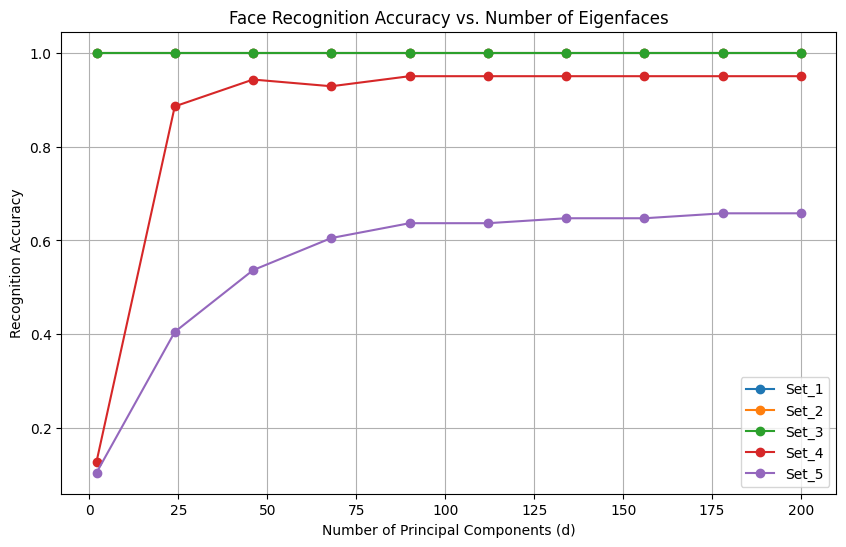

In [ ]:
from sklearn.metrics import accuracy_score

# Load test sets
X_test_sets = []
y_test_sets = []

for i in range(1, 6):
    Xi, yi = loadImages("/content/dataset/faces", f"Set_{i}")
    X_test_sets.append(Xi)
    y_test_sets.append(yi)

accuracies_per_set = {f"Set_{i+1}": [] for i in range(5)}

for d in d_values:
    pca = pca_models[d]
    X_train_proj = train_data[d]

    for i,(X_test, y_test) in enumerate(zip(X_test_sets,y_test_sets)):
        X_test_proj = pca.transform(X_test)
        y_pred = []
        for x in X_test_proj:
            distances = np.linalg.norm(X_train_proj - x, axis=1)
            nearest_idx = np.argmin(distances)
            y_pred.append(y_train[nearest_idx])

        acc = accuracy_score(y_test, y_pred)
        accuracies_per_set[f"Set_{i+1}"].append(acc)

        print(f"d = {d}, Set_{i+1} Accuracy: {acc:.4f}")


plt.figure(figsize=(10, 6))
for set_name, accs in accuracies_per_set.items():
    plt.plot(d_values, accs, marker='o', label=set_name)

plt.xlabel("Number of Principal Components (d)")
plt.ylabel("Recognition Accuracy")
plt.title("Face Recognition Accuracy vs. Number of Eigenfaces")
plt.legend()
plt.grid(True)
plt.show()


Αρχικά, παρατηρώντας τα αποτελέσματα, βλέπουμε ότι το μοντέλο αναγνωρίζει τα τρία πρώτα sets με ακρίβεια 1 για όλες τις τιμές του d. Αυτό ήταν αναμενόμενο και δεν αντικατοπτρίζει σωστά την ποιότητα του μοντέλου, καθώς τα συγκεκριμένα sets συμμετείχαν στην εκπαίδευση. Επομένως, δεν αξιολογείται η ικανότητα γενίκευσης, αλλά κυρίως η ικανότητά του στην απομνημόνευση.

Αντίθετα, το Set 4, το οποίο δεν έχει χρησιμοποιηθεί στην εκπαίδευση, δείχνει πως όσο αυξάνεται ο αριθμός των κύριων συνιστωσών (d), το μοντέλο επιτυγχάνει υψηλότερη ακρίβεια, φτάνοντας έως και το 0.95. Αυτό αποτελεί ένδειξη ότι το μοντέλο γενικεύει καλά σε νέα δεδομένα.

Τέλος, το Set 5 παρουσιάζει παρόμοια συμπεριφορά με το Set 4, αλλά με χαμηλότερη απόδοση, πιθανότατα λόγω διαφορετικών χαρακτηριστικών όπως φωτισμός.

a.Για όλα τα d στο set 2 έχουμε ακρίβεια 1.0 για τους λόγους που ανέφερα παραπάνω

b.Βάση των αποτελεσμάτων στα set 4 και 5 το μοντέλο δείχνει να σταθεροποιείται για d > 100, αφόυ τα γραφήματα μετά από την τιμή αυτή παρουσιάζουν ελάχιστες διακυμάνσεις .

c.Για τους παραπάνω λόγους θα επέλεγα d = 112.

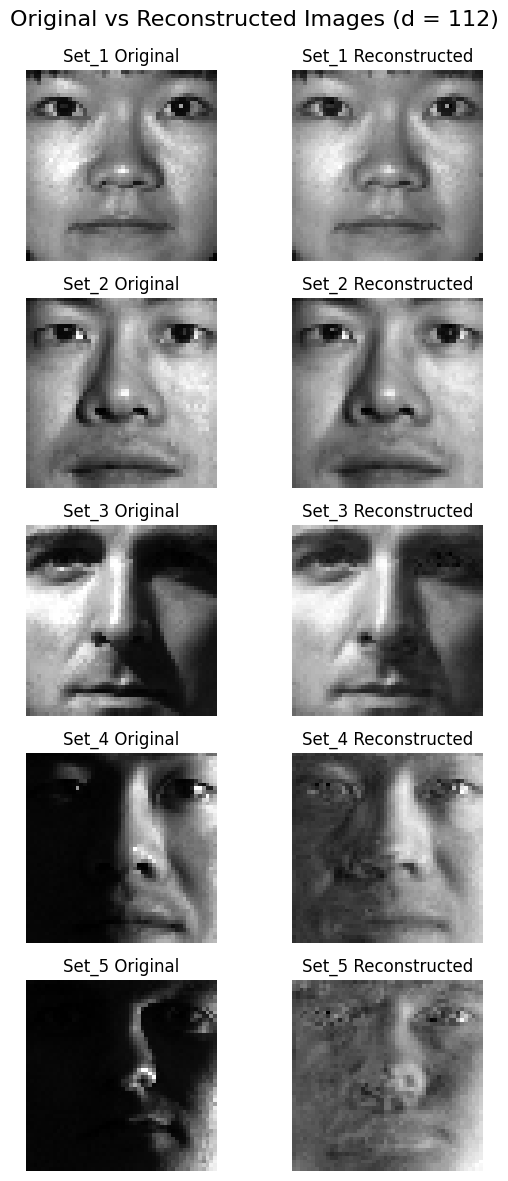

In [ ]:
d = 112
pca = pca_models[d]

fig, axes = plt.subplots(5, 2, figsize=(6, 12))
fig.suptitle(f"Original vs Reconstructed Images (d = {d})", fontsize=16)

for i in range(5):
    X_set = X_test_sets[i]
    y_set = y_test_sets[i]

    idx = random.randint(0, len(X_set) - 1)
    original = X_set[idx]

    # Project and reconstruct
    x_proj = pca.transform([original])
    reconstructed = pca.inverse_transform(x_proj)

    # Display original
    axes[i, 0].imshow(original.reshape(50, 50), cmap='gray')
    axes[i, 0].set_title(f"Set_{i+1} Original")
    axes[i, 0].axis('off')

    # Display reconstructed
    axes[i, 1].imshow(reconstructed.reshape(50, 50), cmap='gray')
    axes[i, 1].set_title(f"Set_{i+1} Reconstructed")
    axes[i, 1].axis('off')

plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()

Για d=112, παρατηρούμε ότι οι ανακατασκευασμένες εικόνες των Set 1–3 είναι πολύ κοντά στις πρωτότυπες, όπως ήταν αναμενόμενο, καθώς τα συγκεκριμένα σύνολα έχουν χρησιμοποιηθεί για την εκπαίδευση του μοντέλου. Στο Set 4, η ανακατασκευασμένη εικόνα εμφανίζεται ελαφρώς πιο θολή σε σχέση με την πρωτότυπη, ιδιαίτερα στις περιοχές με έντονη σκίαση. Παρ’ όλα αυτά, βασικά χαρακτηριστικά όπως το σχήμα της μύτης διατηρούνται ικανοποιητικά. Τέλος, στο Set 5, όπου η σκίαση είναι πιο έντονη, η ανακατασκευή εμφανίζει σημαντική απώλεια λεπτομέρειας και μεγαλύτερη θολούρα, ιδίως στην περιοχή της σκιάς. Επιπλέον, η αναπαράσταση των χαρακτηριστικών του προσώπου είναι αισθητά λιγότερο ακριβής σε σύγκριση με τα προηγούμενα σύνολα.

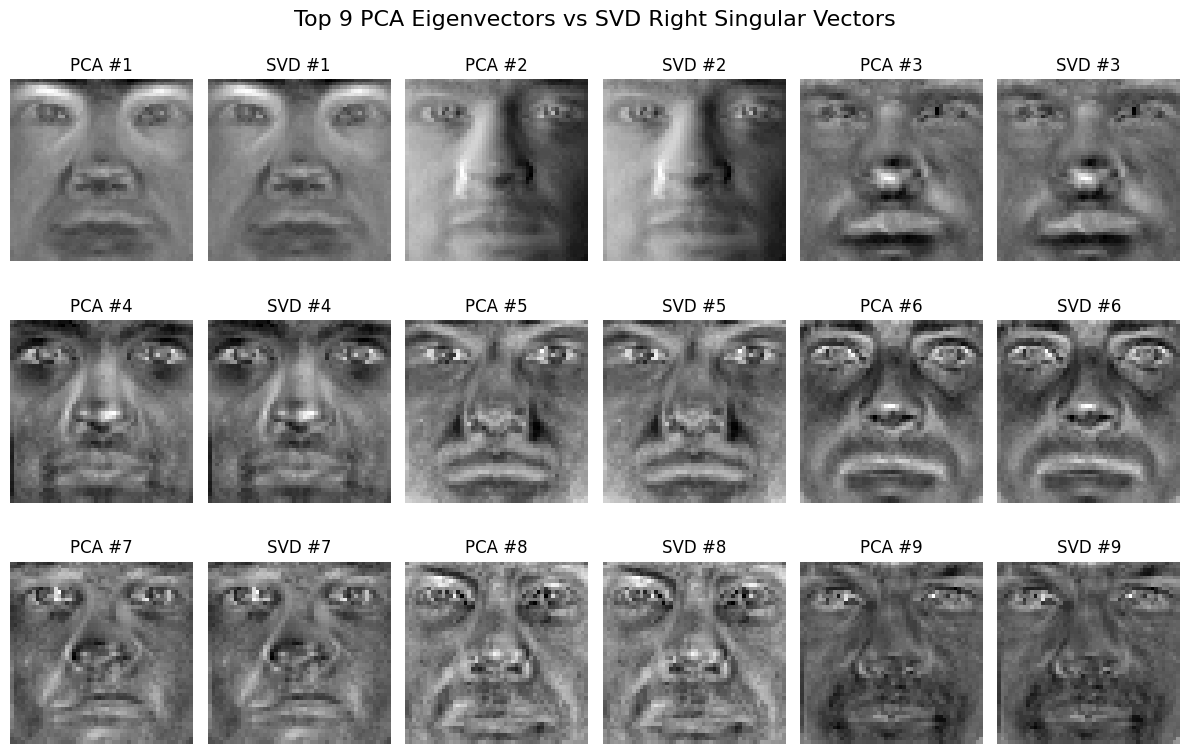

In [ ]:
X1,_ = loadImages("/content/dataset/faces","Set_1")
h, w = 50, 50

X1_centered = X1 - np.mean(X1,axis = 0)

pca = PCA(n_components=9)
pca.fit(X1_centered)
pca_components = pca.components_

_,_,Vt = np.linalg.svd(X1_centered, full_matrices=False)
svd_vectors = Vt[:9]

plt.figure(figsize=(12, 8))
for i in range(9):
    if np.corrcoef(pca_components[i].ravel(), svd_vectors[i].ravel())[0,1] < 0:
        svd_vectors[i] *= -1
    # PCA eigenvector
    plt.subplot(3, 6, 2*i+1)
    plt.imshow(pca_components[i].reshape((h, w)), cmap='gray')
    plt.title(f'PCA #{i+1}')
    plt.axis('off')

    # SVD singular vector
    plt.subplot(3, 6, 2*i+2)
    plt.imshow(svd_vectors[i].reshape((h, w)), cmap='gray')
    plt.title(f'SVD #{i+1}')
    plt.axis('off')

plt.suptitle("Top 9 PCA Eigenvectors vs SVD Singular Vectors", fontsize=16)
plt.tight_layout()
plt.show()

Τα 9 πρώτα singular vectors δεν φαίνεται να διαφέρουν ουσιαστικά από τα αντίστοιχα ιδιοδιανύσματα της PCA, όπως ήταν θεωρητικά αναμενόμενο. Αρχικά παρατηρήθηκαν μικρές διαφορές μεταξύ ορισμένων ζευγών, όμως μετά από περαιτέρω ανάλυση διαπιστώθηκε ότι αυτές οφείλονταν αποκλειστικά στο πρόσημο των διανυσμάτων.